# Qick looks for gridftp log / synda db

- quick and flexible exploration of gridftp server log as well as synda db log entries
- alternatives for gridftp log analysis could be:
> - Kibana et. al. tools are too heavy weight (see e.g. http://www.failureasaservice.com/2015/06/gridftp-log-analysis-with-logstash-and.html )
> - there is a log analyser as part of the netlogger package: http://pydoc.net/Python/netlogger/4.1.0/netlogger.parsers.modules.gridftp/ yet difficult to use standalone ..

In [1]:
from gridlog_parser import *
import itertools
# for development purpose: automatic reload of code
%load_ext autoreload
%autoreload 2

### Provide parameters and initialize the log filter function

In [2]:
file_path = ("C:\Users\Stephan Kindermann\Repos\data-manager-1\Data\esg-server-usage-gridftp.log-full")
# time format =  YYYYMMDDHHMMSS
time_interval = [20160100000000,
                 20181000000000]
size_interval = [100000000,10000000000]

known_users = ["https://esgf-data.dkrz.de/esgf-idp/openid/stephank16",
               "https://esgf-data.dkrz.de/esgf-idp/openid/kbtest",
               "https://esgf-data.dkrz.de/esgf-idp/openid/kbtest11",
     #          "https://pcmdi.llnl.gov/esgf-idp/openid/kbtest",
               "https://pcmdi.llnl.gov/esgf-idp/openid/matt_pritchard_pcmdi",               
               "https://pcmdi.llnl.gov/esgf-idp/openid/elidart",
     #          "https://esgf-data.dkrz.de/esgf-idp/openid/HansRamthun",
     #          "https://esgf-data.dkrz.de/esgf-idp/openid/lukasz",
    #           "STFC",
               "https://esgf-node.ipsl.upmc.fr/esgf-idp/openid/syndatest_ipsl",  
               "https://pcmdi.llnl.gov/esgf-idp/openid/syndatest",
     #          "https://esgf-node.ipsl.upmc.fr/esgf-idp/openid/kbtest",
               "https://esgf-data.dkrz.de/esgf-idp/openid/alaniwi"
               ]

# initialize the filter characterizing relevant log entries (time interval, data size, users)
my_filter = check(time_interval,size_interval,known_users)

#### initialze the parser, the filter parser as well as the selector

In [3]:
parser = get_parser(file_path)     # pure log entry parser, yields dictionaries
select_parser = itertools.ifilter(my_filter,parser)
selector = (get_transfer_info(i) for i in select_parser)

#### generate volume,tranfer_rate lists in dictionaries with 'client' (IP) (or "user" (DN) keys

In [5]:
#volumes, transfer_rates = gen_dicts('user',selector)
volumes, transfer_rates = gen_dicts('client',selector)

# Generate data volume/transfer rate scatter plots

Transfer to:  Hamburg in Germany


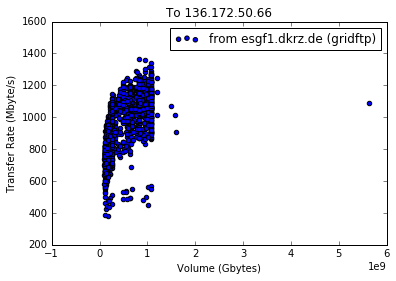

log entry not shown for client ip 136.172.18.100
log entry not shown for client ip 136.172.13.20
Transfer to:  Hamburg in Germany


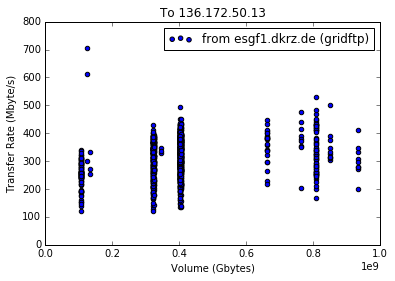

log entry not shown for client ip 136.172.13.119
Transfer to:  Oxford in United Kingdom


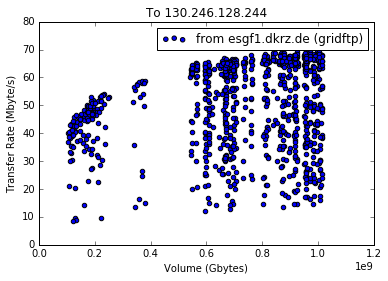

log entry not shown for client ip 136.172.18.190
log entry not shown for client ip 136.172.50.14
log entry not shown for client ip 136.172.18.217
log entry not shown for client ip 136.172.18.215
Transfer to:   in France


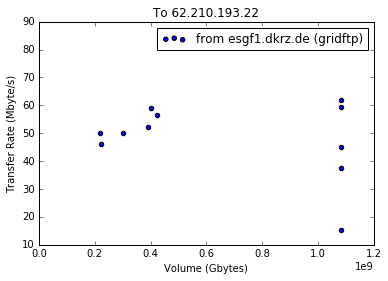

Transfer to:  Oxford in United Kingdom


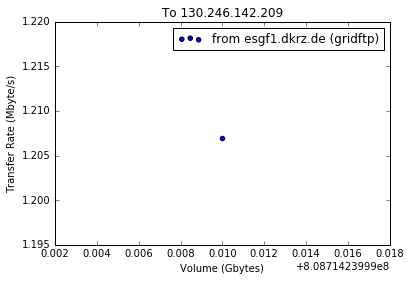

log entry not shown for client ip ::ffff:136.172.18.111
log entry not shown for client ip 136.172.50.67
log entry not shown for client ip 136.172.30.96
log entry not shown for client ip 136.172.18.13
log entry not shown for client ip ::ffff:136.172.50.68
Transfer to:  Berkeley in United States


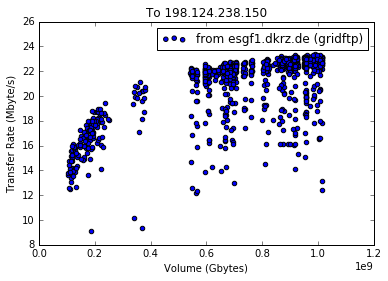

Transfer to:  Hamburg in Germany


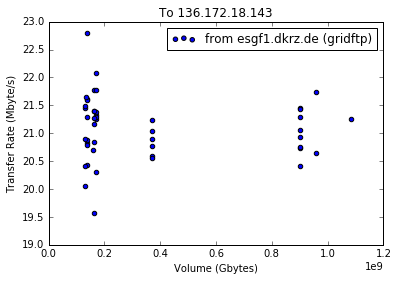

log entry not shown for client ip ::ffff:136.172.18.11


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
# mostly local ips used for local tests
exclude_ips = ["136.172.30.85",
               "136.172.18.4",
               "136.172.18.13",
               "::ffff:136.172.18.11",
               "::ffff:136.172.18.111",
               "::ffff:136.172.50.68",
               "136.172.13.20",
               "136.172.13.100",
               "136.172.13.119",
               "136.172.50.14",
               "136.172.50.67",
               "136.172.30.96",
               "136.172.18.217",
               "136.172.18.215",
               "136.172.18.100",
               "136.172.18.190",
               "136.###"]

for client in volumes.keys():
   if client not in exclude_ips:
       target = 'unknown'
       if len(client.split(".")) == 4:
          # assume valid ip
          geo_info = get_geolocation_for_ip(client)  
          target = geo_info['city']+" in "+geo_info['country_name']
       print "Transfer to: ",target
       plt.scatter(volumes[client],transfer_rates[client],label='from esgf1.dkrz.de (gridftp)')
       plt.xlabel('Volume (Gbytes)')
       plt.ylabel('Transfer Rate (Mbyte/s)') 
       plt.title("To "+client)
       plt.legend()
       plt.show()
   else:
       if client not in volumes.keys():
          print "No valid log entry for client ip",client
       else:
          print "log entry not shown for client ip",client

## generate user id sorted plots

In [10]:
parser = get_parser(file_path)     # pure log entry parser, yields dictionaries
select_parser = itertools.ifilter(my_filter,parser)
selector = (get_transfer_info(i) for i in select_parser)

volumes, transfer_rates = gen_dicts('user',selector)

8


User:  https://pcmdi.llnl.gov/esgf-idp/openid/elidart


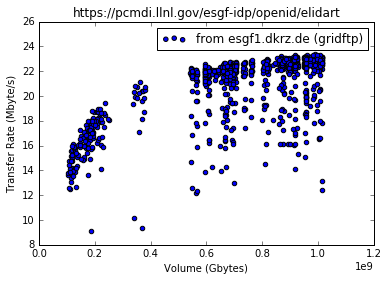

User:  https://esgf-data.dkrz.de/esgf-idp/openid/kbtest11


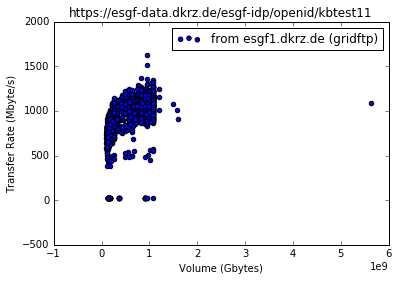

User:  https://pcmdi.llnl.gov/esgf-idp/openid/syndatest


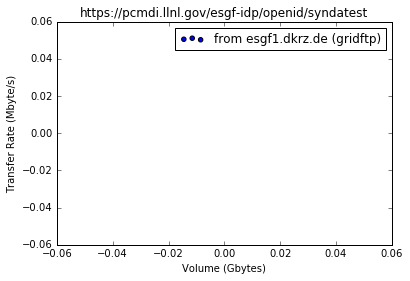

User:  https://esgf-data.dkrz.de/esgf-idp/openid/kbtest


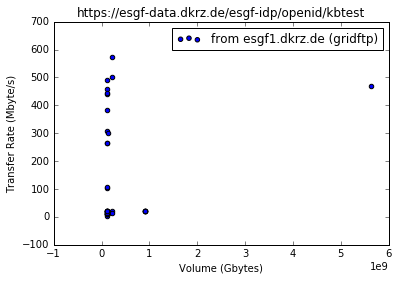

User:  https://esgf-data.dkrz.de/esgf-idp/openid/alaniwi


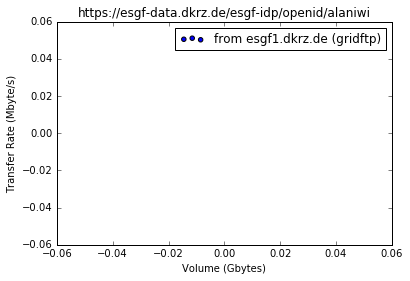

User:  https://esgf-node.ipsl.upmc.fr/esgf-idp/openid/syndatest_ipsl


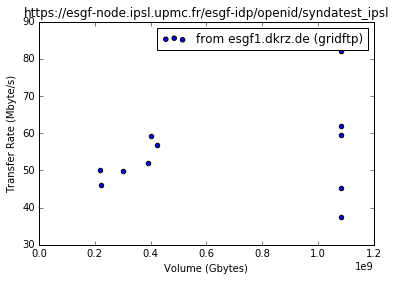

User:  https://pcmdi.llnl.gov/esgf-idp/openid/matt_pritchard_pcmdi


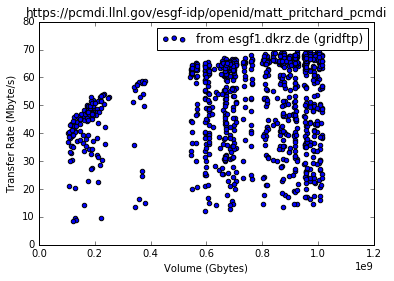

User:  https://esgf-data.dkrz.de/esgf-idp/openid/stephank16


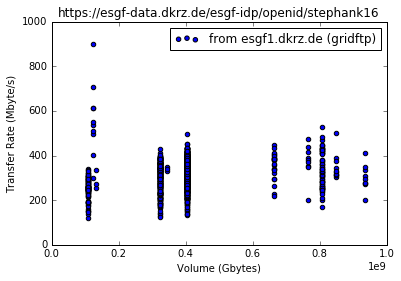

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

for user in volumes.keys():
   print "User: ",user
   plt.scatter(volumes[user],transfer_rates[user],label='from esgf1.dkrz.de (gridftp)')
   plt.xlabel('Volume (Gbytes)')
   plt.ylabel('Transfer Rate (Mbyte/s)') 
   plt.title(user)
   plt.legend()
   plt.show()

# synda quicklooks

In [42]:
import sqlite3
import sys

# only valid after following fix applied to synda.db:
# update file set duration=cast(((julianday(end_date) - julianday(start_date)) * 86400.0) as integer) where status = 'done'
# update file set duration=1 where duration=0 and status='done'
# update file set rate=size/duration where status='done'
def get_synda_info(node_name):
    con = None
    try:
       con = sqlite3.connect("../Data/sdt.db")
       cur = con.cursor()    
       cur.execute('''SELECT size,duration,rate FROM file WHERE data_node=?''',(node_name,))
       data = cur.fetchall()
       return data
    except sqlite3.Error, e:    
       print "Error %s:" % e.args[0]
       sys.exit(1)
        
def valid((size,duration,rate)):
    try: 
       assert size > 1000
       assert duration > 0
       assert rate > 0
       return True
    except AssertionError:
       return False   

#### specify the data nodes to watch as well as the DTN where synda is running

In [43]:
nodes = ['aims3.llnl.gov','esgf1.dkrz.de','esgf-data1.ceda.ac.uk','vesg.ipsl.upmc.fr']

target_name = "mistral00.dkrz.de" # the DTN where synda is running

#### generate plots

Transfer rate scale: 1e7 bytes/s corresponds to ~10 MBytes/s 
-------------------------------------------------------------
Transfer from aims3.llnl.gov (remote data node) to mistral00.dkrz.de (DTN)


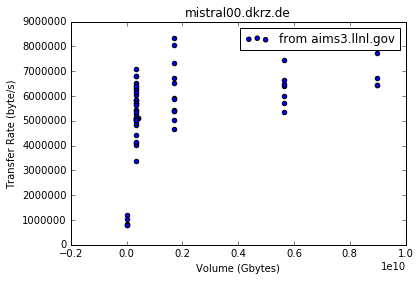

Transfer from esgf1.dkrz.de (remote data node) to mistral00.dkrz.de (DTN)


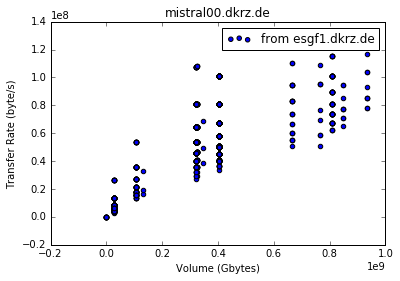

Transfer from esgf-data1.ceda.ac.uk (remote data node) to mistral00.dkrz.de (DTN)


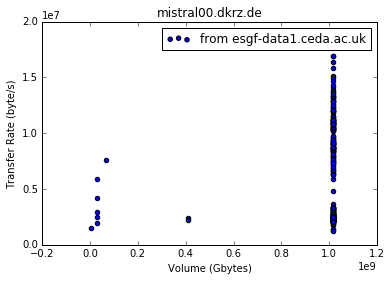

Transfer from vesg.ipsl.upmc.fr (remote data node) to mistral00.dkrz.de (DTN)


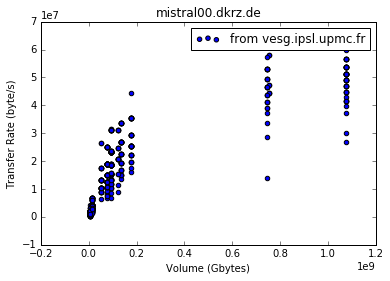

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

print "Transfer rate scale: 1e7 bytes/s corresponds to ~10 MBytes/s "
print "-------------------------------------------------------------"
for node_name in nodes:
   data = get_synda_info(node_name)
   try: 
        volumes,durations,transfer_rates = zip(*filter(valid,data))
        print 'Transfer from {0} (remote data node) to {1} (DTN)'.format(node_name,target_name)

        plt.scatter(volumes,transfer_rates,label='from '+node_name)
        plt.xlabel('Volume (Gbytes)')
        plt.ylabel('Transfer Rate (byte/s)') 
        plt.title(target_name)
        plt.legend()
        plt.show()
   except:
        print "No valid data for node: ",node_name